# Python-executable version of PathView Graph for ARC single BCR model

Runs ARC-class fuel cycle residence time model based on Meschini's work.
Expect simulation to take around 5 minutes to run.

12:53:26 - INFO - LOGGING (log: True)
12:53:26 - INFO - BLOCKS (total: 24, dynamic: 11, static: 13, eventful: 1)
12:53:26 - INFO - GRAPH (nodes: 24, edges: 39, alg. depth: 2, loop depth: 0, runtime: 0.623ms)
12:53:26 - INFO - STARTING -> TRANSIENT (Duration: 25920000.00s)
12:53:29 - INFO - --------------------   1% | 2.6s<06:14 | 1033.5 it/s
12:53:31 - INFO - --------------------   2% | 5.5s<04:34 | 1334.9 it/s
12:53:34 - INFO - --------------------   3% | 7.9s<04:39 | 1337.4 it/s
12:53:37 - INFO - --------------------   4% | 10.5s<05:06 | 1218.3 it/s
12:53:40 - INFO - #-------------------   5% | 13.7s<04:41 | 1297.0 it/s
12:53:43 - INFO - #-------------------   6% | 16.6s<04:02 | 1452.8 it/s
12:53:45 - INFO - #-------------------   7% | 19.4s<04:14 | 1380.3 it/s
12:53:48 - INFO - #-------------------   8% | 21.9s<04:01 | 1405.6 it/s
12:53:51 - INFO - #-------------------   9% | 24.5s<03:59 | 1410.1 it/s
12:53:53 - INFO - ##------------------  10% | 27.1s<03:50 | 1465.1 it/s
12:53:56 -

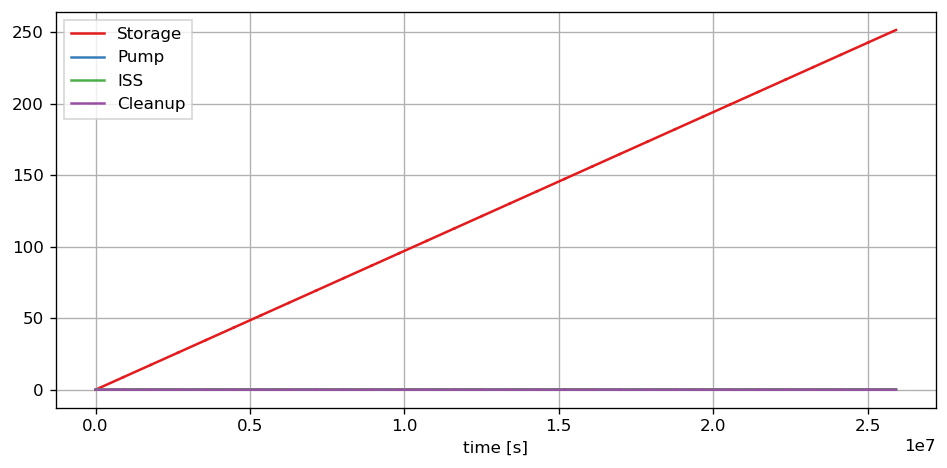

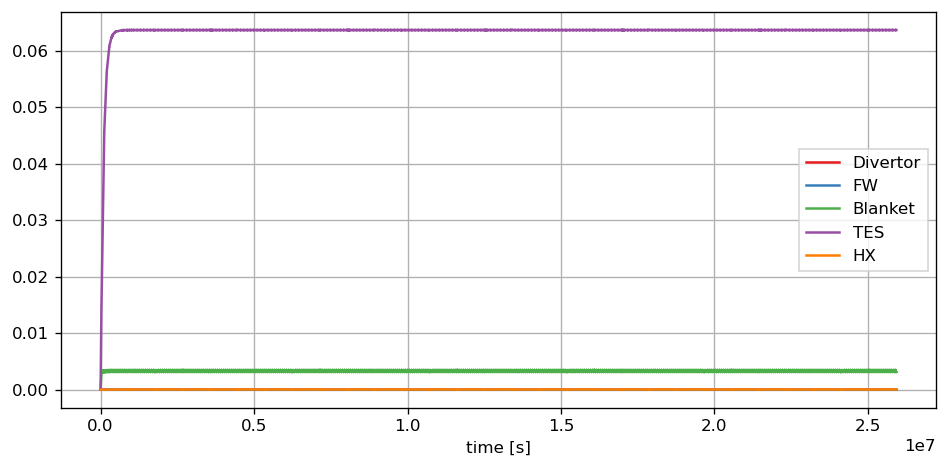

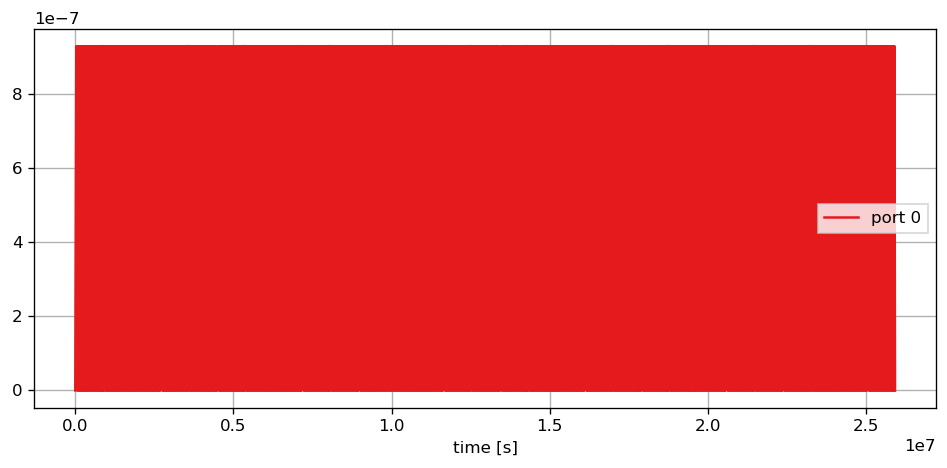

Results saved to: ../../results/ARC_same_as_meschini_results.npz
Metadata saved to: ../../results/ARC_same_as_meschini_metadata.json

Saved arrays:
  scope_0_Storage_Pump_ISS_Cleanup_data: shape (4, 288024)
  scope_0_Storage_Pump_ISS_Cleanup_time: shape (288024,)
  scope_1_Divertor_FW_Blanket_TES_HX_data: shape (5, 288024)
  scope_1_Divertor_FW_Blanket_TES_HX_time: shape (288024,)
  scope_2_data: shape (1, 288024)
  scope_2_time: shape (288024,)

Scope information:
{
  "scope_0_Storage_Pump_ISS_Cleanup": {
    "labels": [
      "Storage",
      "Pump",
      "ISS",
      "Cleanup"
    ],
    "data_shape": [
      4,
      288024
    ],
    "time_length": 288024
  },
  "scope_1_Divertor_FW_Blanket_TES_HX": {
    "labels": [
      "Divertor",
      "FW",
      "Blanket",
      "TES",
      "HX"
    ],
    "data_shape": [
      5,
      288024
    ],
    "time_length": 288024
  },
  "scope_2": {
    "labels": [],
    "data_shape": [
      1,
      288024
    ],
    "time_length": 288024
 

In [ ]:

from pathview_python_code import arc_same_as_meschini

# Execute the function to run the model and save results
arc_same_as_meschini(300 * 24 * 3600) # 300 days in seconds

Plot saved to: ../../plots/ARC_same_as_meschini_inventory_vs_time.png


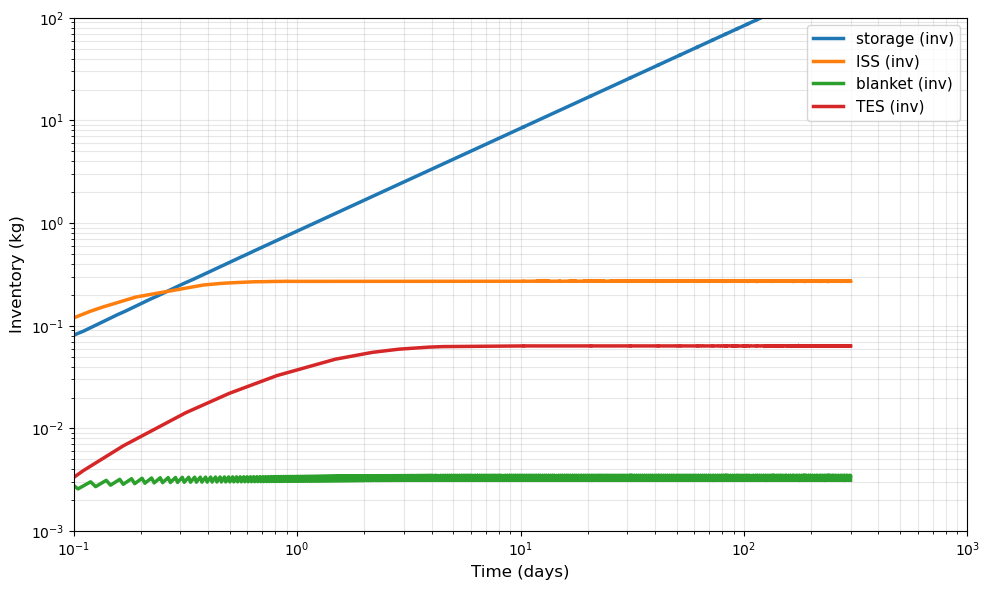

In [4]:
### Plot Results: Inventory vs Time ###

import numpy as np
import json
import matplotlib.pyplot as plt
import os

# Load results and metadata
results_path = '../../results/ARC_same_as_meschini_results.npz'
metadata_path = '../../results/ARC_same_as_meschini_metadata.json'

loaded_data = np.load(results_path)
with open(metadata_path, 'r') as f:
    metadata = json.load(f)

# Extract time (same for all scopes)
time = loaded_data['scope_0_Storage_Pump_ISS_Cleanup_time']
time_days = time / (24 * 3600)

# Extract inner fuel cycle data (scope 0)
inner_fc_data = loaded_data['scope_0_Storage_Pump_ISS_Cleanup_data']

# Extract outer fuel cycle data (scope 1)
outer_fc_data = loaded_data['scope_1_Divertor_FW_Blanket_TES_HX_data']

# Create figure
fig, ax = plt.subplots(figsize=(10, 6))

# Plot each inventory component
# Storage (index 0 from scope 0)
ax.loglog(time_days, inner_fc_data[0], linewidth=2.5, label='storage (inv)')

# ISS (index 2 from scope 0)
ax.loglog(time_days, inner_fc_data[2], linewidth=2.5, label='ISS (inv)')

# Blanket (index 2 from scope 1)
ax.loglog(time_days, outer_fc_data[2], linewidth=2.5, label='blanket (inv)')

# TES (index 3 from scope 1)
ax.loglog(time_days, outer_fc_data[3], linewidth=2.5, label='TES (inv)')

# Styling
ax.set_xlabel('Time (days)', fontsize=12)
ax.set_ylabel('Inventory (kg)', fontsize=12)
ax.set_xlim([0.1, 1e3])
ax.set_ylim([1e-3, 1e2])
ax.grid(True, which='both', alpha=0.3)
ax.legend(loc='best', fontsize=11)

plt.tight_layout()

# Save plot to plots folder
plots_dir = '../../plots'
os.makedirs(plots_dir, exist_ok=True)
plot_filename = 'ARC_same_as_meschini_inventory_vs_time.png'
plot_path = os.path.join(plots_dir, plot_filename)
plt.savefig(plot_path, dpi=300, bbox_inches='tight')
print(f"Plot saved to: {plot_path}")

plt.show()
